# Charging Sessions Data Cleaning and Preperation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import zscore

### Load data


In [2]:
df_weather = pd.read_csv("data/weather_burbank_airport.csv")
df_ev = pd.read_csv("data/charging_sessions.csv")

### Inspect Data

In [3]:
df_ev

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."


In [4]:
print(df_ev.describe())    

         Unnamed: 0  kWhDelivered        siteID        userID
count  66450.000000  66450.000000  66450.000000  49187.000000
mean    4726.102062     11.787916      1.472656   1800.494582
std     3568.025394     10.314789      0.499256   2617.548614
min        0.000000      0.501000      1.000000      1.000000
25%     1845.000000      5.097000      1.000000    431.000000
50%     3960.000000      9.140000      1.000000    818.000000
75%     7027.000000     14.183000      2.000000   1805.000000
max    15291.000000    108.797242      2.000000  19923.000000


In [5]:
print(df_ev.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB
None


In [6]:
print(df_ev.shape) 

(66450, 13)


## Assign correct Datatypes

In [7]:
print(df_ev.dtypes)

Unnamed: 0            int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
siteID                int64
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
dtype: object


In [8]:
df_ev['id'] = df_ev['id'].astype('string')

df_ev['connectionTime'] = pd.to_datetime(df_ev['connectionTime'], errors='coerce')  
df_ev['disconnectTime'] = pd.to_datetime(df_ev['disconnectTime'], errors='coerce')  
df_ev['doneChargingTime'] = pd.to_datetime(df_ev['doneChargingTime'], errors='coerce') 

df_ev['connectionTime'] = df_ev['connectionTime'].dt.tz_convert('America/Los_Angeles')
df_ev['disconnectTime'] = df_ev['disconnectTime'].dt.tz_convert('America/Los_Angeles')
df_ev['doneChargingTime'] = df_ev['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

df_ev['sessionID'] = df_ev['sessionID'].astype('string')
df_ev['siteID'] = df_ev['siteID'].astype('string')
df_ev['spaceID'] = df_ev['spaceID'].astype('string')
df_ev['stationID'] = df_ev['stationID'].astype('string')
df_ev['timezone'] = df_ev['timezone'].astype('string')
df_ev['userID'] = df_ev['userID'].astype('string')

#df_ev['userInputs'] = df_ev['userInputs'].astype('list')

## Convert userInput from list into more Columns

In [9]:
print(df_ev['userInputs'].head())

0    [{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...
1    [{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...
2    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
3    [{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...
4    [{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...
Name: userInputs, dtype: object


In [10]:
#Convert list

df_ev['userInputs'] = df_ev['userInputs'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) else []
)


In [ ]:
print(df_ev['userInputs'].apply(type).unique())  

[<class 'list'>]


In [12]:
#explode list into rows
df_exploded = df_ev.explode('userInputs', ignore_index=True)

In [13]:
#normalize dictionaries into separate columns
df_normalized = pd.json_normalize(df_exploded['userInputs'])

#modify time datatype and convert to correct timezone
df_normalized['modifiedAt'] = pd.to_datetime(df_normalized['modifiedAt'], errors='coerce')
df_normalized['requestedDeparture'] = pd.to_datetime(df_normalized['requestedDeparture'], errors='coerce')

df_normalized['modifiedAt'] = df_normalized['modifiedAt'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
df_normalized['requestedDeparture'] = df_normalized['requestedDeparture'].dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')

In [14]:
df_normalized

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture,userID
0,250.0,25.00,100.0,463.0,2020-01-02 05:09:39-08:00,True,2020-01-02 12:51:54-08:00,194.0
1,280.0,70.00,250.0,595.0,2020-01-02 05:37:11-08:00,True,2020-01-02 15:31:50-08:00,4275.0
2,400.0,8.00,20.0,60.0,2020-01-02 05:57:17-08:00,True,2020-01-02 06:56:35-08:00,344.0
3,400.0,8.00,20.0,65.0,2020-01-02 06:00:03-08:00,True,2020-01-02 07:04:58-08:00,1117.0
4,400.0,8.00,20.0,65.0,2020-01-02 06:00:19-08:00,True,2020-01-02 07:04:58-08:00,1117.0
...,...,...,...,...,...,...,...,...
80634,240.0,31.20,130.0,355.0,2019-07-31 11:08:23-07:00,True,2019-07-31 17:03:04-07:00,393.0
80635,333.0,6.66,20.0,455.0,2019-07-31 11:41:02-07:00,True,2019-07-31 19:15:41-07:00,220.0
80636,333.0,19.98,60.0,184.0,2019-07-31 12:04:57-07:00,True,2019-07-31 15:08:40-07:00,1974.0
80637,275.0,22.00,80.0,60.0,2019-07-31 12:20:10-07:00,True,2019-07-31 13:19:47-07:00,942.0


In [15]:
df_normalized['userID'] = df_normalized['userID'].astype('string')
df_normalized['paymentRequired'] = df_normalized['paymentRequired'].astype('bool')

print(df_normalized.dtypes)

WhPerMile                                         float64
kWhRequested                                      float64
milesRequested                                    float64
minutesAvailable                                  float64
modifiedAt            datetime64[ns, America/Los_Angeles]
paymentRequired                                      bool
requestedDeparture    datetime64[ns, America/Los_Angeles]
userID                                     string[python]
dtype: object


In [16]:
#combine normalized data with the original DataFrame
df_evUP = pd.concat([df_exploded.drop(columns=['userInputs']), df_normalized], axis=1)

In [17]:
#drop duplicated columns after combined
df_evUP = df_evUP.loc[:, ~df_evUP.columns.duplicated()]

In [18]:
df_evUP

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,WhPerMile,kWhRequested,milesRequested,minutesAvailable,modifiedAt,paymentRequired,requestedDeparture
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,250.0,25.00,100.0,463.0,2020-01-02 05:09:39-08:00,True,2020-01-02 12:51:54-08:00
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,280.0,70.00,250.0,595.0,2020-01-02 05:37:11-08:00,True,2020-01-02 15:31:50-08:00
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,400.0,8.00,20.0,60.0,2020-01-02 05:57:17-08:00,True,2020-01-02 06:56:35-08:00
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,400.0,8.00,20.0,65.0,2020-01-02 06:00:03-08:00,True,2020-01-02 07:04:58-08:00
4,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,400.0,8.00,20.0,65.0,2020-01-02 06:00:19-08:00,True,2020-01-02 07:04:58-08:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80634,10083,5d574ad2f9af8b4c10c03652,2019-07-31 11:08:04-07:00,2019-07-31 16:29:18-07:00,2019-07-31 16:30:18-07:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,240.0,31.20,130.0,355.0,2019-07-31 11:08:23-07:00,True,2019-07-31 17:03:04-07:00
80635,10084,5d574ad2f9af8b4c10c03653,2019-07-31 11:40:41-07:00,2019-07-31 17:59:42-07:00,2019-07-31 14:44:23-07:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,333.0,6.66,20.0,455.0,2019-07-31 11:41:02-07:00,True,2019-07-31 19:15:41-07:00
80636,10085,5d574ad2f9af8b4c10c03654,2019-07-31 12:04:40-07:00,2019-07-31 15:44:22-07:00,2019-07-31 15:45:21-07:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,333.0,19.98,60.0,184.0,2019-07-31 12:04:57-07:00,True,2019-07-31 15:08:40-07:00
80637,10086,5d574ad2f9af8b4c10c03655,2019-07-31 12:19:47-07:00,2019-07-31 17:34:51-07:00,2019-07-31 14:25:30-07:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,275.0,22.00,80.0,60.0,2019-07-31 12:20:10-07:00,True,2019-07-31 13:19:47-07:00


### Convert new fields into correct datatypes

In [19]:
df_evUP['modifiedAt'] = pd.to_datetime(df_evUP['modifiedAt'], errors='coerce') 
df_evUP['requestedDeparture'] = pd.to_datetime(df_evUP['requestedDeparture'], errors='coerce')

df_evUP['modifiedAt'] = df_evUP['modifiedAt'].dt.tz_convert('America/Los_Angeles')
df_evUP['requestedDeparture'] = df_evUP['requestedDeparture'].dt.tz_convert('America/Los_Angeles')

df_evUP['paymentRequired'] = df_evUP['paymentRequired'].astype('bool')

In [20]:
print(df_evUP.dtypes)

Unnamed: 0                                          int64
id                                         string[python]
connectionTime        datetime64[ns, America/Los_Angeles]
disconnectTime        datetime64[ns, America/Los_Angeles]
doneChargingTime      datetime64[ns, America/Los_Angeles]
kWhDelivered                                      float64
sessionID                                  string[python]
siteID                                     string[python]
spaceID                                    string[python]
stationID                                  string[python]
timezone                                   string[python]
userID                                     string[python]
WhPerMile                                         float64
kWhRequested                                      float64
milesRequested                                    float64
minutesAvailable                                  float64
modifiedAt            datetime64[ns, America/Los_Angeles]
paymentRequire

## Look for and handle missing data

In [21]:
print(df_evUP.isnull().sum())

Unnamed: 0                0
id                        0
connectionTime            0
disconnectTime            0
doneChargingTime       5310
kWhDelivered              0
sessionID                 0
siteID                    0
spaceID                   0
stationID                 0
timezone                  0
userID                17263
WhPerMile             17263
kWhRequested          17263
milesRequested        17263
minutesAvailable      17263
modifiedAt            17263
paymentRequired           0
requestedDeparture    17263
dtype: int64


Missing userIDs and from userInput-Fields because of unregistered Users using the charging Stations.


Missing Data in 'doneChargingTime'

In [22]:
#analyze proportion of missing values
missing_proportion = df_evUP['doneChargingTime'].isnull().mean()
print(f"Proportion of missing 'doneChargingTime' values: {missing_proportion:.2%}")

# investigate patterns
print(df_evUP[df_evUP['doneChargingTime'].isnull()].describe())

Proportion of missing 'doneChargingTime' values: 6.58%
         Unnamed: 0  kWhDelivered    WhPerMile  kWhRequested  milesRequested  \
count   5310.000000   5310.000000  4401.000000   4401.000000     4401.000000   
mean    2344.518644     14.301217   348.231993     28.442875       88.876392   
std     2349.466889     11.986883    95.076125     22.491014       77.085172   
min        0.000000      0.502000   200.000000      0.000000        0.000000   
25%      629.250000      5.950000   283.000000     12.000000       30.000000   
50%     1140.000000     10.970000   330.000000     21.000000       60.000000   
75%     3801.750000     18.634000   400.000000     37.500000      110.000000   
max    14871.000000     77.700000  2000.000000    200.000000      775.000000   

       minutesAvailable  
count       4401.000000  
mean         386.749148  
std          215.459485  
min           22.000000  
25%          212.000000  
50%          421.000000  
75%          515.000000  
max         1467

In [23]:
#no significant patterns or proportion so dropping rows
#df_evUP_cleaned = df_evUP.dropna(subset=['doneChargingTime'])
#print(df_evUP_cleaned.isnull().sum())

In [24]:
df_evUP_cleaned_registered_users = df_evUP.dropna(subset=['userID'])
print(df_evUP_cleaned_registered_users.isnull().sum())

Unnamed: 0               0
id                       0
connectionTime           0
disconnectTime           0
doneChargingTime      4401
kWhDelivered             0
sessionID                0
siteID                   0
spaceID                  0
stationID                0
timezone                 0
userID                   0
WhPerMile                0
kWhRequested             0
milesRequested           0
minutesAvailable         0
modifiedAt               0
paymentRequired          0
requestedDeparture       0
dtype: int64


In [25]:
print(df_normalized.info())
print(df_normalized.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80639 entries, 0 to 80638
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype                              
---  ------              --------------  -----                              
 0   WhPerMile           63376 non-null  float64                            
 1   kWhRequested        63376 non-null  float64                            
 2   milesRequested      63376 non-null  float64                            
 3   minutesAvailable    63376 non-null  float64                            
 4   modifiedAt          63376 non-null  datetime64[ns, America/Los_Angeles]
 5   paymentRequired     80639 non-null  bool                               
 6   requestedDeparture  63376 non-null  datetime64[ns, America/Los_Angeles]
 7   userID              63376 non-null  string                             
dtypes: bool(1), datetime64[ns, America/Los_Angeles](2), float64(4), string(1)
memory usage: 4.4 MB
None
WhPerMile        

In [26]:
#Drop all null-values from UserInput datafields

df_normalized.dropna(inplace=True)

In [39]:
# Calculate charging time duration
df_evUP['connectionDuration'] = (df_evUP['doneChargingTime'] - df_evUP['connectionTime']).dt.total_seconds() / 3600.0

# Identify and remove outliers based on conchargingnection time duration
df_evUP['zscore_connectionDuration'] = zscore(df_evUP['connectionDuration'])
outliers = df_evUP[np.abs(df_evUP['zscore_connectionDuration']) > 3]
print(f"Number of outliers: {len(outliers)}")



Number of outliers: 0


In [31]:
print(df_evUP.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80639 entries, 0 to 80638
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype                              
---  ------                     --------------  -----                              
 0   Unnamed: 0                 80639 non-null  int64                              
 1   id                         80639 non-null  string                             
 2   connectionTime             80639 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime             80639 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime           75329 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered               80639 non-null  float64                            
 6   sessionID                  80639 non-null  string                             
 7   siteID                     80639 non-null  string                             
 8   spaceID                    80639 non-null  str

Outliers in kWhDelivered: 6950
Outliers in connectionDuration: 2049


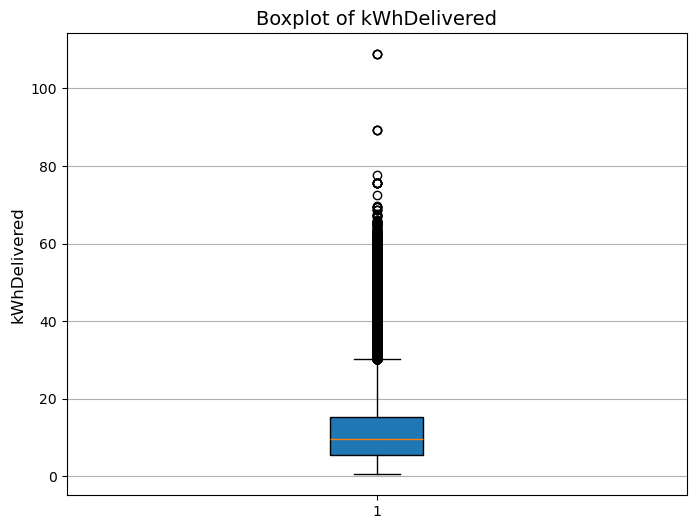

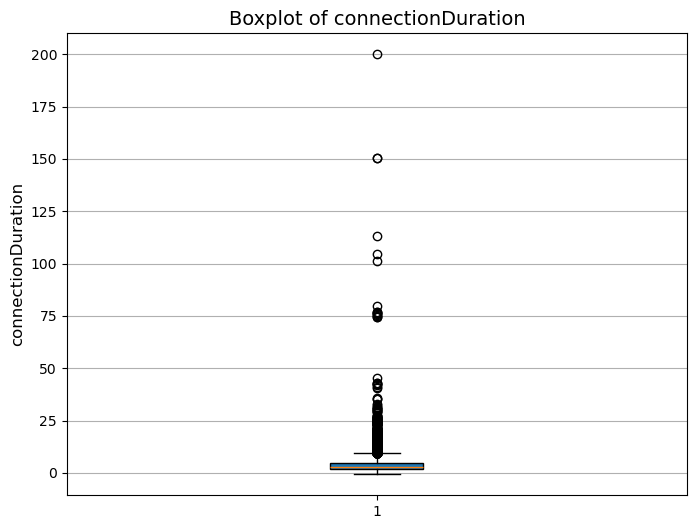

In [36]:
# Detect outliers using the IQR method
numerical_columns = ['kWhDelivered', 'connectionDuration']
for column in numerical_columns:
    Q1 = df_evUP[column].quantile(0.25)  # First quartile
    Q3 = df_evUP[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_evUP[(df_evUP[column] < lower_bound) | (df_evUP[column] > upper_bound)]
    print(f"Outliers in {column}: {len(outliers)}")

# Boxplot for each column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_evUP[column].dropna(), vert=True, patch_artist=True, showfliers=True)
    plt.title(f'Boxplot of {column}', fontsize=14)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='y')
    plt.show()

In [41]:

# Remove outliers
#df_evUP_no_outliers = df_evUP[np.abs(df_evUP['zscore_connectionDuration']) <= 3]
#print(f"Shape after removing outliers: {df_evUP_no_outliers.shape}")

df_evUP_ID = df_evUP.drop_duplicates(subset='sessionID', keep='first')
print(f"Number of unique sessionIDs: {df_evUP_ID['sessionID'].nunique()}")
print(f"Total number of rows after removing duplicates: {df_evUP_ID.shape[0]}")

Number of unique sessionIDs: 65037
Total number of rows after removing duplicates: 65037


## Save cleaned Charging Sessions as csv

In [28]:
#df_evUP.to_csv('cleaned_charging_withDCT.csv')
df_evUP.to_csv('data/cleaned_chargingdata.csv')
df_evUP_cleaned_registered_users.to_csv('data/cleaned_chargingdata_reg_user.csv')
df_normalized.to_csv('data/userInputs.csv')